In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

array([ 5,  6,  9, 10, 17, 19, 26, 31])

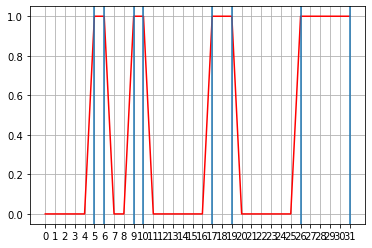

In [5]:
def create_test_array(length):
    arr = []
    indices = []
    initial = random.randint(0,1)
    if initial == 1:
        indices.append(0)
    index = 0
    while len(arr) < length:
        step = random.randint(2,int(length/5))
        if len(arr) + step > length - 1:
            step = length - len(arr)
        else:
            index += step
            if initial == 1:
                indices.append(index - 1)
            else:
                indices.append(index)
        for _ in range(step):
            arr.append(initial)
        initial = 1 if initial == 0 else 0
    if initial == 0:
        # NOTE: initial has switched back, the last appended value was 1
        indices.append(length - 1)
    return np.array(arr[:length]), np.array(indices)

LENGTH = 32
l, indices = create_test_array(LENGTH)
plt.plot(np.arange(0, LENGTH), l, color='red')
ax = plt.gca()
ax.set_xticks(np.arange(0, LENGTH))
for i in indices:
    plt.axvline(i)
plt.grid(True)
indices

In [8]:
# https://stackoverflow.com/questions/30399534/shift-elements-in-a-numpy-array#30534478
# cf. shift5

def shift_array(arr, num, fill=np.nan):
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = fill
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = fill
        result[:num] = arr[-num:]
    else:
        result[:] = arr
    return result

In [9]:
# begin of step l[n] = 0, l[n+1] = 1
# end of step l[n] = 1, l[n+1] = 0

# step 1: create shifted array
l_shifted = shift_array(l, -1, fill=l[0])
l_shifted.shape

(32,)

In [10]:
step_changes = np.logical_xor(l, l_shifted)
step_changes.shape

(32,)

In [11]:
changes = np.arange(0, LENGTH)[step_changes]
adjustment = np.tile([1, 0], int(len(changes) / 2))
changes += adjustment
changes

array([ 5,  6,  9, 10, 17, 19, 26, 31])

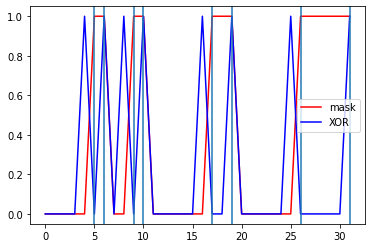

In [12]:
plt.plot(np.arange(0, LENGTH), l, color='red', label='mask')
plt.plot(np.arange(0, LENGTH), step_changes, color='blue', label='XOR')
for c in changes:
    plt.axvline(c)
plt.legend()
None

In [13]:
# holy grail

def convert_format(arr):
    # create shifted array with orignal[n+1] = shifted[n]
    shifted_arr = shift_array(arr, -1, fill=arr[-1])
    
    # step_changes must differ with in value with their successor
    # begin of step arr[n] = 0, arr[n+1] = 1
    # -> step starts at n+1
    # end of step arr[n] = 1, arr[n+1] = 0
    # -> step ends at n
    step_changes = np.logical_xor(arr, shifted_arr)
    
    # create array with indices and apply boolean mask for selection
    changes = np.arange(0, len(arr))[step_changes]
    # add start of first step at 0 if the prediction starts with a step
    if arr[0] == 1:
        changes = np.insert(changes, 0, -1)
    # add end of last step at len(arr) - 1 if the prediction ends with a step
    if arr[-1] == 1:
        changes = np.insert(changes, len(changes), len(arr) - 1)
    
    correct_starts = np.tile([1, 0], int(len(changes)/2))
    changes += correct_starts
    
    # convert array (vector) to matrix
    nested = changes.reshape(int(len(changes) / 2), 2)
    return nested

In [14]:
formatted = convert_format(l)
formatted

array([[ 5,  6],
       [ 9, 10],
       [17, 19],
       [26, 31]])

In [15]:
indices

array([ 5,  6,  9, 10, 17, 19, 26, 31])